Dogs & Cats Classification                          
Dataset: https://www.kaggle.com/competitions/dogs-vs-cats/data

In [1]:
import os 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [2]:
path,dirs,files=next(os.walk('train'))
files_count=len(files)
files_count

25000

In [3]:
file_names=os.listdir('train')
file_names

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

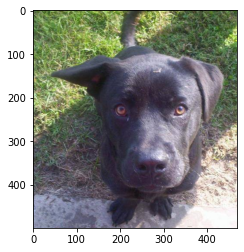

In [4]:
img=mpimg.imread('train/dog.8.jpg')
imgplot =plt.imshow(img)
plt.show()

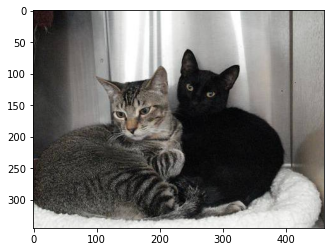

In [5]:
img=mpimg.imread('train/cat.8.jpg')
imgplot =plt.imshow(img)
plt.show()

In [6]:
dogs=0
cats=0
for img_file in file_names:
    name=img_file[0:3]
    if name=='dog':
        dogs+=1
    else:
        cats+=1

dogs,cats

(12500, 12500)

In [17]:
# creating dir for resized images
os.mkdir('resized images')

In [19]:
og_folder='train'
resized_folder="resized images"

for i in range(25000):
    filename=os.listdir(og_folder)[i]
    img_path=og_folder+'/'+filename

    img=Image.open(img_path)
    img=img.resize((224,224))
    img=img.convert('RGB')

    newImgPath=resized_folder+'/'+filename
    img.save(newImgPath)

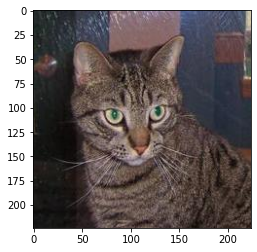

In [23]:
img=mpimg.imread('resized images/cat.1.jpg')
imgplot =plt.imshow(img)
plt.show()

Creating labels for resized images

cat--> 0

dog -->1


In [24]:
file_names=os.listdir("resized images")

labels=[]

for i in range(25000):
    file_name=file_names[i]
    label=file_name[0:3]
    if label=='dog':
        labels.append(1)
    else:
        labels.append(0)


In [25]:
values, counts=np.unique(labels,return_counts=True)
print(values,counts)


[0 1] [12500 12500]


In [26]:
import cv2 
import glob 

In [ ]:
image_directory='resized images/'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]

images=np.asarray([cv2.imread(file) for file in files])

In [ ]:
X=images
Y=np.asarray(labels)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

Building the model

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
mobilenet_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [33]:
n_classes=2

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(n_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train,epoch=5)

In [ ]:
score,acc=model.evaluation(x_test_scaled,y_test)

Predictive System 

In [ ]:
input_image_path=input("Path of the image to be predicted: ")
input_image=cv2.imread(input_image_path)

cv2.imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,244))

input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
    print("Cat")
else:
    print("Dog")